<a href="https://colab.research.google.com/github/vinuthnachilukuri/Natural-Language-Processing-_1407/blob/main/NLP_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import gensim
from gensim.models import Word2Vec

# List of words
words = ['king', 'queen', 'man', 'woman', 'paris', 'france', 'london', 'england']

# We need a larger corpus for meaningful embeddings, so we'll create some sample sentences
sentences = [
    ['king', 'queen', 'man', 'woman'],
        ['paris', 'france', 'london', 'england'],
            ['king', 'man', 'queen', 'woman'],
                ['paris', 'france', 'capital'],
                    ['london', 'england', 'capital']
                         ]

# Train the Word2Vec model  (Removed extra space here)
model = Word2Vec(sentences, vector_size=50, window=2, min_count=1, workers=4)

# Extract vectors for each word in the list
word_vectors = {word: model.wv[word] for word in words}

# Display the word vectors
for word, vector in word_vectors.items():
    print(f"Word: {word}\nVector: {vector}\n")

Word: king
Vector: [-0.01427803  0.00248206 -0.01435343 -0.00448924  0.00743861  0.01166625
  0.00239637  0.00420546 -0.00822078  0.01445067 -0.01261408  0.00929443
 -0.01643995  0.00407294 -0.0099541  -0.00849538 -0.00621797  0.01131042
  0.0115968  -0.0099493   0.00154666 -0.01699156  0.01561961  0.01851458
 -0.00548466  0.00160045  0.0014933   0.01095577 -0.01721216  0.00116891
  0.01373884  0.00446319  0.00224935 -0.01864431  0.01696473 -0.01252825
 -0.00598475  0.00698757 -0.00154526  0.00282258  0.00356398 -0.0136578
 -0.01944962  0.01808117  0.01239611 -0.01382586  0.00680696  0.00041213
  0.00950749 -0.01423989]

Word: queen
Vector: [ 0.00855287  0.00015212 -0.01916856 -0.01933109 -0.01229639 -0.00025714
  0.00399483  0.01886394  0.0111687  -0.00858139  0.00055663  0.00992872
  0.01539662 -0.00228845  0.00864684 -0.01162876 -0.00160838  0.0162001
 -0.00472013 -0.01932691  0.01155852 -0.00785964 -0.00244575  0.01996103
 -0.0045127  -0.00951413 -0.01065877  0.01396178 -0.01141774

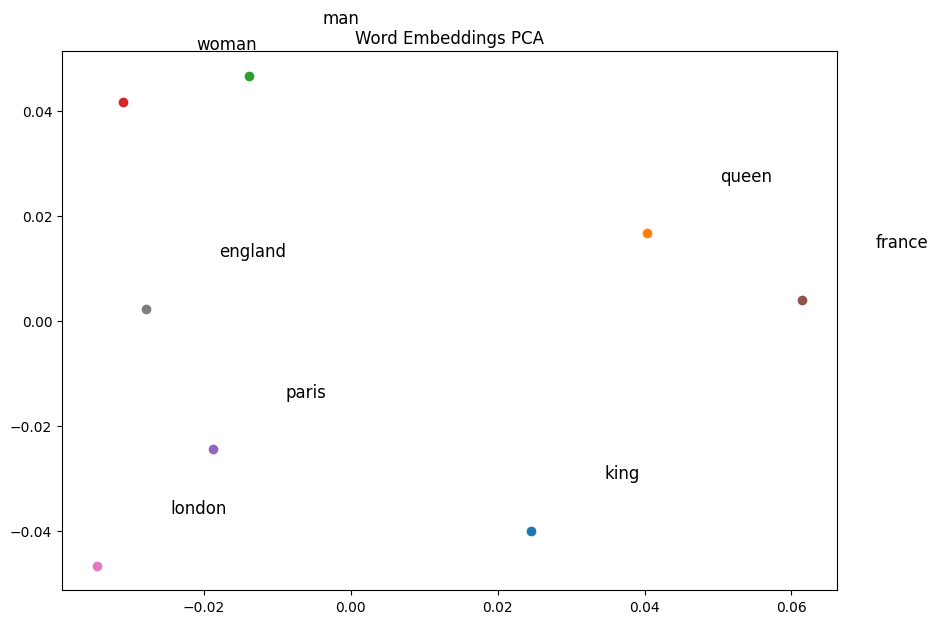

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract the word vectors from the Word2Vec model
vectors = [model.wv[word] for word in words]

# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plotting the words in 2D space
plt.figure(figsize=(10, 7))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i][0], reduced_vectors[i][1])
    plt.text(reduced_vectors[i][0]+0.01, reduced_vectors[i][1]+0.01, word, fontsize=12)

plt.title('Word Embeddings PCA')
plt.show()


In [8]:
import spacy

# Load the English model
nlp = spacy.load('en_core_web_sm')

# The sentence to be parsed
sentence = "The quick brown fox jumps over the lazy dog"

# Parse the sentence
doc = nlp(sentence)

# Print the dependency parsing results
for token in doc:
    print(f"Word: {token.text}, POS: {token.pos_}, Dependency: {token.dep_}, Head: {token.head.text}")


Word: The, POS: DET, Dependency: det, Head: fox
Word: quick, POS: ADJ, Dependency: amod, Head: fox
Word: brown, POS: ADJ, Dependency: amod, Head: fox
Word: fox, POS: NOUN, Dependency: nsubj, Head: jumps
Word: jumps, POS: VERB, Dependency: ROOT, Head: jumps
Word: over, POS: ADP, Dependency: prep, Head: jumps
Word: the, POS: DET, Dependency: det, Head: dog
Word: lazy, POS: ADJ, Dependency: amod, Head: dog
Word: dog, POS: NOUN, Dependency: pobj, Head: over
